In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [30]:
import os

cwd = os.getcwd()
print(cwd)

/home/jovyan/102-project/nikki


Importing libraries and cleaning up the data set:

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path  
dem_candidates = pd.read_csv('../datasets/dem_candidates.csv')
endorsement_cols = dem_candidates.columns[pd.Series(dem_candidates.columns).str.contains('Endorsed|Party Support|Support|\\?')]
dem_candidates[endorsement_cols] = dem_candidates[endorsement_cols].fillna(0)
binarydata = dem_candidates.columns[pd.Series(dem_candidates.columns).isin(['Veteran?', 'Self-Funder?', 'LGBTQ?', 'STEM?', 'Obama Alum?', 'Race'])]
dem_candidates[binarydata] = dem_candidates[binarydata].fillna(0)
dem_candidates[binarydata] = dem_candidates[binarydata].replace({'No': 0, 'Yes': 1})
dem_candidates[endorsement_cols] = dem_candidates[endorsement_cols].replace({'No': 0, 'Yes': 1})
dem_candidates['General Status'] = dem_candidates['General Status'].replace({'None': 0, 'On the Ballot': 1})
dem_candidates['Race'] = dem_candidates['Race'].replace({'Nonwhite': 1, 'White': 0})
dem_candidates.fillna(0, inplace = True)

In [32]:
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dem_candidates.to_csv(Path('dem_candidates_cleaned.csv'))

In [34]:
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,0.0,-28.879999,...,0,0,0,0,0,0,0,0,0,0


In [35]:
def count_candidates_by_district(df, district_column, new_column_name):
    """
    Adds a column to the DataFrame with the count of candidates in each district.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the candidates and districts.
    district_column (str): The name of the column with district information.
    new_column_name (str): The name of the new column to hold the counts.

    Returns:
    pd.DataFrame: The original DataFrame with an additional column for candidate counts per district.
    """
    # Calculate the number of candidates in each district
    district_counts = df.groupby(district_column).size().reset_index(name=new_column_name)
    
    # Merge the counts back into the original DataFrame
    df_merged = df.merge(district_counts, on=district_column)

    return df_merged

In [36]:
dem_candidates = count_candidates_by_district(dem_candidates, 'District', 'total_runners') #run the above func to get count of ppl in each race and add that as a new col
dem_candidates = dem_candidates[dem_candidates['total_runners']>1] #filter out all the rows where only 1 person ran. 

house = dem_candidates[dem_candidates['Office Type'] == 'Representative'] #just house
house.to_csv(Path('house.csv'))


In [37]:
house.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?',
       'total_runners'],
      dtype='object')

Fitting a Frequentist Logistic Regression model using Sklearn:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


train, test = train_test_split(house, test_size = .30, random_state = 101)

In [39]:
X_train = train[['Partisan Lean', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'total_runners']]
y_train = train['General Status']

X_test = test[['Partisan Lean', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'total_runners']]
y_test = test['General Status']

logisticmodel = LogisticRegression(
    penalty='none', solver='lbfgs'
)

logisticmodel.fit(X_test, y_test)

probs = logisticmodel.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.8402061855670103


We first created a Logistic Regression model using a subset of features in the house dataset. We employed feature engineering to include a column of how many total runners were participating in the election. Because the data on each candidate is not independent since the outcome of a race for a single candidate is affected by the outcome for another candidate in that same race, we included the number of total runners. Additionally, because both Biden and Warren only endorsed 5 candidates each, we excluded those features. Emily's list endorsed 42 candidates in the 2018 house of representative elections, so we intentionally included this column. There were 33 Obama Alums, so we included this as well. 

In [40]:
dem_candidates['Obama Alum?'].sum()

33

Fitting a Logistic Regression model using statsmodel:

In [41]:
X = house[['Partisan Lean', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?', 'total_runners']]  # independent variables

# Add a constant term to the independent variables
X = sm.add_constant(X)

y = house['General Status']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.465644
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         General Status   No. Observations:                  645
Model:                          Logit   Df Residuals:                      633
Method:                           MLE   Df Model:                           11
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.1904
Time:                        17:50:50   Log-Likelihood:                -300.34
converged:                       True   LL-Null:                       -370.97
Covariance Type:            nonrobust   LLR p-value:                 8.991e-25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3526      0.360     -0.980      0.327      -1.058       0.352
Partisan

In [42]:
print(result.aic, result.bic)

624.6809468097429 678.3119506112921


While our initial model had a decent accuracy of approximately 84%, we can further optimize our model by selecting the best combination of features. As we can see in the summary from the model above, the log-likelihood is pretty low. Additionally, when we interpret the confidence intervals for the probabilities of the coefficients, we can see that many of these intervals include 0. Thus, it would make sense to re-evaluate these features or take them out. Additionally, when comparing the coefficients, we can see that some of the coefficients only have a marginal affect on the dependent variable, such as 'LGBTQ?' or 'Self-Funder?'.

Forward selection of features:

In [52]:
df = house[['Partisan Lean', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?',
       'Sanders Endorsed?', 'total_runners', 'General Status']]

y = df['General Status']

best_features = []
best_aic = float('inf') 

for feature in df.columns.difference(['General Status']):
    # Add a constant term and the current feature
    X = sm.add_constant(df[best_features + [feature]])

    # Fit the logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Check AIC and update if it is lower
    if result.aic < best_aic:
        best_aic = result.aic
        best_features.append(feature)

# Fit the final model with the best features
X_final = sm.add_constant(df[best_features])
final_model = sm.Logit(y, X_final)
final_result = final_model.fit()


print(final_result.summary(), final_result.aic)

Optimization terminated successfully.
         Current function value: 0.571552
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544678
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531690
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531649
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531116
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511468
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.478014
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476522
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.472113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.471118
  

In [53]:
train, test = train_test_split(df, test_size = .30, random_state = 101)

Backward selection of features: 

In [54]:
# Assume df is your DataFrame with the dependent variable ('y') and multiple independent variables ('X1', 'X2', ...)
# Specify the dependent variable
y = df['General Status']

# Specify the independent variables
X = sm.add_constant(df.drop('General Status', axis=1))
X_shuffled = X.sample(frac=1, axis=1, random_state=42)


# Fit the initial model with all features
initial_model = sm.Logit(y, X_shuffled)
initial_result = initial_model.fit()
best_aic = initial_result.aic
best_bic = initial_result.bic
best_model = initial_model
selected_features = list(X_shuffled.columns)

# Backward selection
for feature in X_shuffled.columns[1:]:  # Exclude the constant term
    # Fit the model without the current feature
    X_subset = X_shuffled[selected_features].drop(feature, axis=1)
    model = sm.Logit(y, X_subset)
    result = model.fit()

    # Compare AIC and BIC
    if result.aic < best_aic and result.bic < best_bic:
        best_aic = result.aic
        best_bic = result.bic
        best_model = model
        selected_features.remove(feature)

# Fit the final model with the selected features
final_result = best_model.fit()

# Print the summary of the final model
print(final_result.summary())

Optimization terminated successfully.
         Current function value: 0.451436
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455189
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.451963
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.459343
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.453779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.460613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.471883
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.453779
  

Testing the best recommended features in a logistic regression model with sklearn: 

In [46]:
X_train1 = train[['Partisan Lean', 'Elected Official?', 'STEM?', 'Party Support?', 'Guns Sense Candidate?', 'Emily Endorsed?', 'total_runners']]
y_train1 = train['General Status']

X_test1 = test[['Partisan Lean', 'Elected Official?', 'STEM?', 'Party Support?', 'Guns Sense Candidate?', 'Emily Endorsed?', 'total_runners']]
y_test1 = test['General Status']

logisticmodel1 = LogisticRegression(
    penalty='none', solver='lbfgs'
)

logisticmodel1.fit(X_test1, y_test1)

probs = logisticmodel1.predict_proba(X_test1)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.845360824742268


Nonparametric models: Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Using the optimal features selected in the previous section:
X_cols = ['Partisan Lean', 'Elected Official?', 'STEM?', 'Race', 'LGBTQ?', 'Veteran?', 'Self-Funder?', 'Party Support?', 'Guns Sense Candidate?', 'Emily Endorsed?', 'total_runners']
y_col = 'General Status'
forest_model = RandomForestClassifier(max_features=1)

forest_model.fit(train[X_cols], train[y_col])

train["forest_pred"] = forest_model.predict(train[X_cols])
test["forest_pred"] = forest_model.predict(test[X_cols])

In [58]:
train_rmse = np.mean((train["forest_pred"] - train[y_col]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test[y_col]) ** 2) ** 0.5
forest_accuracy = accuracy_score(test[y_col], test["forest_pred"])

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)
print("Accuracy:", forest_accuracy)


Training set error for random forest: 0.2208630521496931
Test set error for random forest:     0.5324520209738858
Accuracy: 0.7164948453608248


Nonparametric models: Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


tree_model = DecisionTreeClassifier()

tree_model.fit(train[X_cols], train[y_col])

train["tree_pred"] = tree_model.predict(train[X_cols])
test["tree_pred"] = tree_model.predict(test[X_cols])

In [50]:
train_rmse = np.mean((train["tree_pred"] - train[y_col]) ** 2) ** 0.5
test_rmse = np.mean((test["tree_pred"] - test[y_col]) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree:    ", test_rmse)


tree_accuracy = accuracy_score(test[y_col], test["tree_pred"])
print("Accuracy:", tree_accuracy)

Training set error for decision tree: 0.30516616098334465
Test set error for decision tree:     0.5832719653532221
Accuracy: 0.6597938144329897


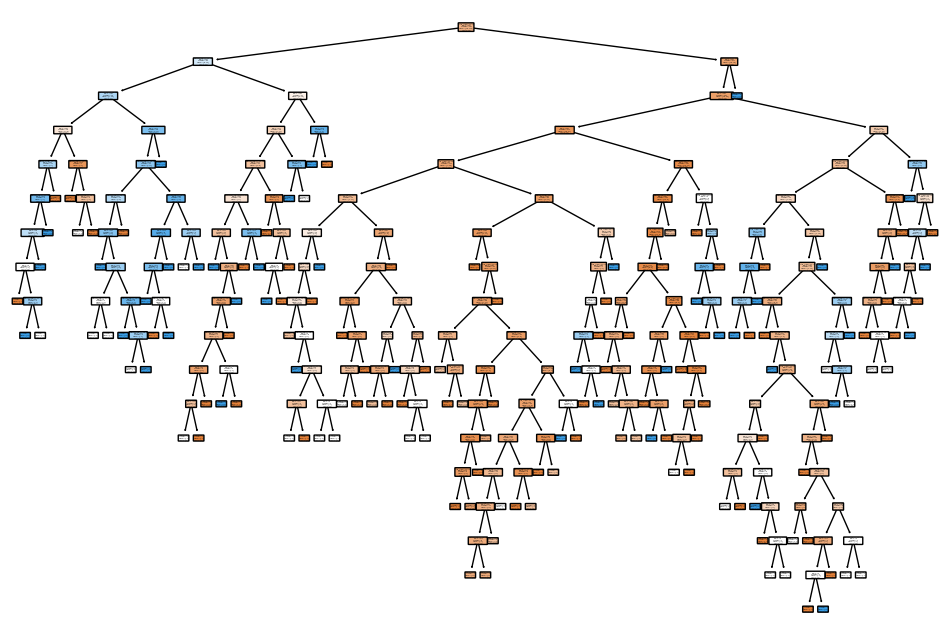

In [26]:
plt.figure(figsize=(12, 8))

plot_tree(tree_model, feature_names=X_cols, class_names = True, filled=True, rounded=True);

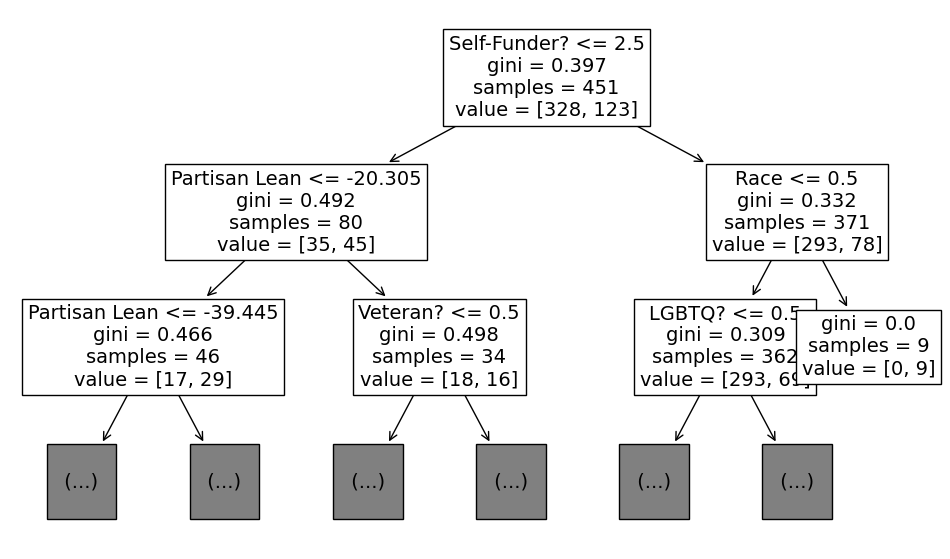

In [59]:
plt.figure(figsize=(12, 7))
plot_tree(tree_model, max_depth=2, fontsize=14, feature_names=X_cols);

In [371]:
house.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,total_runners
6,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Lost,None,0.0,-30.680000,...,0,0,0,0,0,0,0,0,0,2
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,1.0,-30.680000,...,0,0,0,0,0,0,0,0,0,2
8,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Lost,None,0.0,-33.080002,...,0,0,0,0,0,0,0,0,0,2
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,1.0,-33.080002,...,0,0,0,0,0,0,0,0,0,2
10,Adia McClellan Winfrey,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Lost,None,0.0,-33.660000,...,0,0,0,0,0,0,0,0,0,2


In [28]:
house[house['Emily Endorsed?'] == 1].head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,total_runners
48,Virginia Madueno,CA,U.S. House California District 10,Representative,Regular,6/5/18,Lost,None,0.0,0.62,...,0,0,0,0,0,1,0,0,0,6
59,Katie Hill,CA,U.S. House California District 25,Representative,Regular,6/5/18,Advanced,None,1.0,2.02,...,0,0,0,0,0,0,0,0,0,4
64,Mai Khanh Tran,CA,U.S. House California District 39,Representative,Regular,6/5/18,Lost,None,0.0,2.99,...,0,0,0,0,0,0,0,0,0,6
75,Katie Porter,CA,U.S. House California District 45,Representative,Regular,6/5/18,Advanced,None,1.0,-1.43,...,1,0,1,0,1,0,0,0,0,4
83,Rachel Payne,CA,U.S. House California District 48,Representative,Regular,6/5/18,Lost,None,0.0,-4.18,...,0,0,0,0,0,0,0,0,0,8


In [115]:
'''
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv("../datasets/dem_candidates.csv")
encoder = OneHotEncoder()
encoder.fit(data[['STEM?', 'Obama Alum?', 'Emily Endorsed?', 'Party Support?', 'Guns Sense Candidate?']])
encoded_data = encoder.transform(data[['STEM?', 'Obama Alum?', 'Emily Endorsed?', 'Party Support?', 'Guns Sense Candidate?']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names(['STEM?', 'Obama Alum?', 'Emily Endorsed?', 'Party Support?', 'Guns Sense Candidate?'])

'''
                        

'\nfrom sklearn.preprocessing import OneHotEncoder\ndata = pd.read_csv("../datasets/dem_candidates.csv")\nencoder = OneHotEncoder()\nencoder.fit(data[[\'STEM?\', \'Obama Alum?\', \'Emily Endorsed?\', \'Party Support?\', \'Guns Sense Candidate?\']])\nencoded_data = encoder.transform(data[[\'STEM?\', \'Obama Alum?\', \'Emily Endorsed?\', \'Party Support?\', \'Guns Sense Candidate?\']]).toarray()\n\nencoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names([\'STEM?\', \'Obama Alum?\', \'Emily Endorsed?\', \'Party Support?\', \'Guns Sense Candidate?\'])\n\n'

In [116]:
mergeddf = pd.read_csv("../datasets/ready_for_modelling.csv")
mergeddf = mergeddf.drop('Unnamed: 0', axis = 1)
mergeddf.head()

,General Status,Female,Listed.military.service.,Position.on.Same.Sex.Marriage,total_runners_brookings,Partisan Lean,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,...,PCCC Endorsed?_0.0,PCCC Endorsed?_1.0,Indivisible Endorsed?_0.0,Indivisible Endorsed?_1.0,WFP Endorsed?_0.0,WFP Endorsed?_1.0,VoteVets Endorsed?_0.0,VoteVets Endorsed?_1.0,No Labels Support?_0.0,No Labels Support?_1.0
0,0,0,0,0,2,-30.680000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,2,-30.680000,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,2,-33.080002,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,2,-33.080002,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,-33.660000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
#filtering features for variance threshold
from sklearn.feature_selection import VarianceThreshold
mergeddf.columns
columns_sums = pd.DataFrame(mergeddf.sum())
columns_sums = columns_sums.rename(columns = {0: 'sum'})
removingzeros = columns_sums[columns_sums['sum'] == 0]
removingzeros

,sum
Education_nan,0.0
Marital.Status_nan,0.0
Position.on.Affordable.Care.Act..ObamaCare._nan,0.0
Position.on.Minimum.Wage_nan,0.0
Position.on.Federal.Taxes_nan,0.0
Position.on.Business.Regulations_nan,0.0
Position.on.National.Debt.Deficit_nan,0.0
Position.on.Social.Security_nan,0.0
Position.on.Gun.Control_nan,0.0
Position.on.Immigration_nan,0.0


In [359]:
d = pd.read_csv("../datasets/2_57pm.csv")
d = d.drop(columns = ['Education', 'Position.on.Climate.Change', 'Position.on.Handling.Terrorism.Abroad', 'Our Revolution Endorsed?', 'Indivisible Endorsed?', 'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?', 'Biden Endorsed?', 'Justice Dems Endorsed?',
       'PCCC Endorsed?'])
data = d
columns_to_drop = ['Partisan Lean', 'total_runners_brookings', 'total_runners_house', 'Unnamed: 0', 'District', 'House Candidate', 'Brookings Candidate', 'Warren Endorsed? ', 'Sanders Endorsed?', 'Primary.Outcome', 'District Abbrev']
data = data.drop(columns = columns_to_drop)
#columns_to_merge = ['
d.head()

,Unnamed: 0,Primary.Outcome,District,Brookings Candidate,Female,Listed.military.service.,Marital.Status,Previous.Electoral.Experience,Position.on.Affordable.Care.Act..ObamaCare.,Position.on.Minimum.Wage,...,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Warren Endorsed?,Sanders Endorsed?,total_runners_house
0,0,0,AL-1,lizetta mcconnell,1.0,"No, the candidate does not include any informa...",Married,NaN,Candidate provides no information,Candidate provides no information,...,No,No,Yes,No,NaN,NaN,NaN,NaN,NaN,2
1,1,1,AL-1,robert kennedy,0.0,"Yes, the candidate serves or served in the mil...",Married,NaN,Candidate provides complicated/complex/unclear...,Candidate provides no information,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,2
2,2,0,AL-2,audri williams,1.0,"Yes, the candidate serves or served in the mil...",Other,NaN,Candidate provides complicated/complex/unclear...,Candidate supports raising the minimum wage,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,2
3,3,1,AL-2,tabitha isner,1.0,"No, the candidate does not include any informa...",Married,NaN,Candidate provides complicated/complex/unclear...,Candidate provides no information,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,2
4,4,0,AL-3,adia winfrey,1.0,"No, the candidate does not include any informa...",No information,NaN,Candidate provides no information,Candidate provides no information,...,No,No,Yes,No,NaN,NaN,Yes,NaN,NaN,2


In [360]:
from sklearn.preprocessing import OneHotEncoder

In [361]:
num_counts = pd.DataFrame(data.nunique())
num_counts = num_counts.rename(columns = {0 : 'count'})


In [369]:
counts = num_counts[num_counts['count'] >= 3]
non_ohe = num_counts[num_counts['count'] < 3]
columns_to_ohe = list(counts.index)
columns_to_merge = list(non_ohe.index)
cols_to_merge = np.array(columns_to_merge)
cols = np.append(cols_to_merge, 'Partisan Lean')
cols = np.append(cols, 'total_runners_house')
cols = np.append(cols, 'General Status')
columns_to_ohe

['Marital.Status',
 'Position.on.Affordable.Care.Act..ObamaCare.',
 'Position.on.Minimum.Wage',
 'Position.on.Federal.Taxes',
 'Position.on.Business.Regulations',
 'Position.on.National.Debt.Deficit',
 'Position.on.Social.Security',
 'Position.on.Gun.Control',
 'Position.on.Immigration',
 'Position.on.Abortion',
 'Position.on.Criminal.Justice.Reform',
 'Position.on.Federal.K.12.Education.Policy',
 'Position.on.Campaign.Finance.Reform',
 'Position.on.Legalization.Decriminalization.of.Marijuana.Policy',
 'Position.on.Defense.Spending',
 'Position.on.Russia',
 'Party.Category',
 'Trump.Mention',
 'Obama.Mention',
 'Sanders.Mention',
 'Clinton.Mention',
 'Special.Counsel.Mention',
 'Travel.Ban.Mention']

In [363]:
encoder = OneHotEncoder(drop = 'first')

encoder.fit(d[columns_to_ohe])
encoded_data = encoder.transform(d[columns_to_ohe]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names(columns_to_ohe))
encoded_df
final_features = encoded_df.join(d[list(cols)])
#fill NaN values in non-OHE columns with 0s
final_features.fillna(0, inplace = True)
show = final_features.select_dtypes(include = 'object')
columns_to_binarize = ['Listed.military.service.', 'Previous.Electoral.Experience',
       'Position.on.Same.Sex.Marriage', 'SinglePayer', 'Race', 'Veteran?',
       'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?',
       'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?']

In [364]:
# Define a mapping for binarization
binary_mapping = {'Yes': 1, 'No': 0, 'Candidate supports marriage equality measures	': 1, 'Candidate provides no information': 0, 'White': 1, 
                  'Nonwhite': 0, 'No, the candidate does not include any information about serving in the military': 0, 
                  'Yes, the candidate serves or served in the military': 1, 
                  'Yes, candidate supports universal healthcare reforms': 1, '0': 0, 
                  'Candidate mentions previous elected office experience': 1, '0': 0,
                  'Candidate provides no information': 0, 'Candidate supports marriage equality measures': 1}

# Apply binarization to selected columns
final_features[columns_to_binarize] = final_features[columns_to_binarize].replace(binary_mapping)

#Make sure all columns have the same datatype
final_features = final_features.astype(float)

In [365]:
dependents.columns

Index(['Marital.Status_Engaged', 'Marital.Status_Married',
       'Marital.Status_No information', 'Marital.Status_Other',
       'Marital.Status_Single', 'Marital.Status_Widowed',
       'Position.on.Affordable.Care.Act..ObamaCare._Candidate provides complicated/complex/unclear position',
       'Position.on.Affordable.Care.Act..ObamaCare._Candidate provides no information',
       'Position.on.Minimum.Wage_Candidate provides no information',
       'Position.on.Minimum.Wage_Candidate supports raising the minimum wage',
       'Position.on.Federal.Taxes_Candidate provides complicated/complex/unclear position',
       'Position.on.Federal.Taxes_Candidate provides no information',
       'Position.on.Federal.Taxes_Candidate supports raising taxes on the wealthy/corporations',
       'Position.on.Business.Regulations_Candidate provides complicated/complex/unclear position',
       'Position.on.Business.Regulations_Candidate provides no information',
       'Position.on.Business.Regulatio

In [370]:
final_features.shape

(578, 88)

In [366]:
df = final_features
dependents = final_features.drop('General Status', axis = 1)
y = d['General Status']

best_features = []
best_aic = float('inf') 

for feature in dependents.columns:
    # Add a constant term and the current feature
    X = sm.add_constant(dependents[best_features + [feature]])
    print(feature)

    # Fit the logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Check AIC and update if it is lower
    if result.aic < best_aic:
        best_aic = result.aic
        best_features.append(feature)

# Fit the final model with the best features
X_final = sm.add_constant(df[best_features])
final_model = sm.Logit(y, X_final)
final_result = final_model.fit()


print(final_result.summary(), final_result.aic)

Marital.Status_Engaged
Optimization terminated successfully.
         Current function value: 0.563195
         Iterations 5
Marital.Status_Married
Optimization terminated successfully.
         Current function value: 0.557151
         Iterations 5
Marital.Status_No information
Optimization terminated successfully.
         Current function value: 0.556993
         Iterations 5
Marital.Status_Other
         Current function value: 0.555600
         Iterations: 35
Marital.Status_Single
Optimization terminated successfully.
         Current function value: 0.554657
         Iterations 5
Marital.Status_Widowed
         Current function value: 0.553181
         Iterations: 35
Position.on.Affordable.Care.Act..ObamaCare._Candidate provides complicated/complex/unclear position
Optimization terminated successfully.
         Current function value: 0.554143
         Iterations 5
Position.on.Affordable.Care.Act..ObamaCare._Candidate provides no information
Optimization terminated successfully.


LinAlgError: Singular matrix